# Problema 1
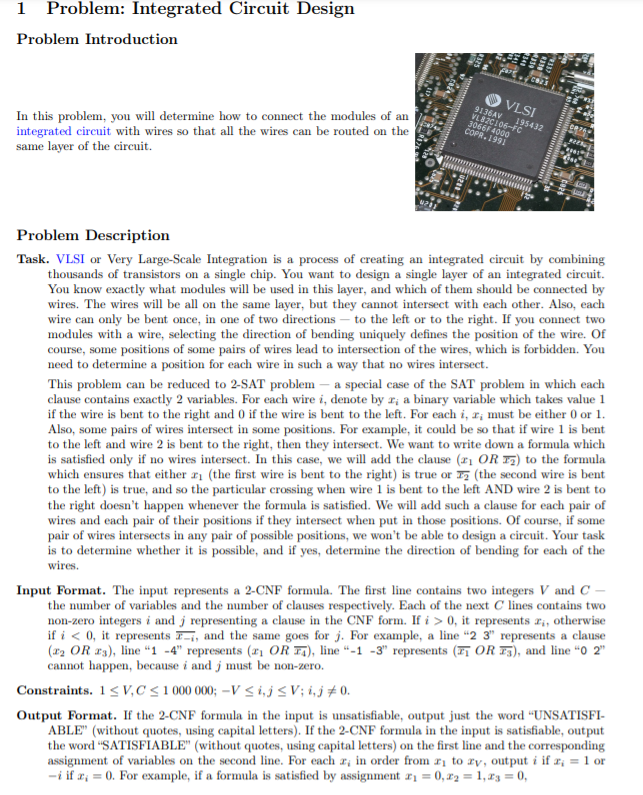

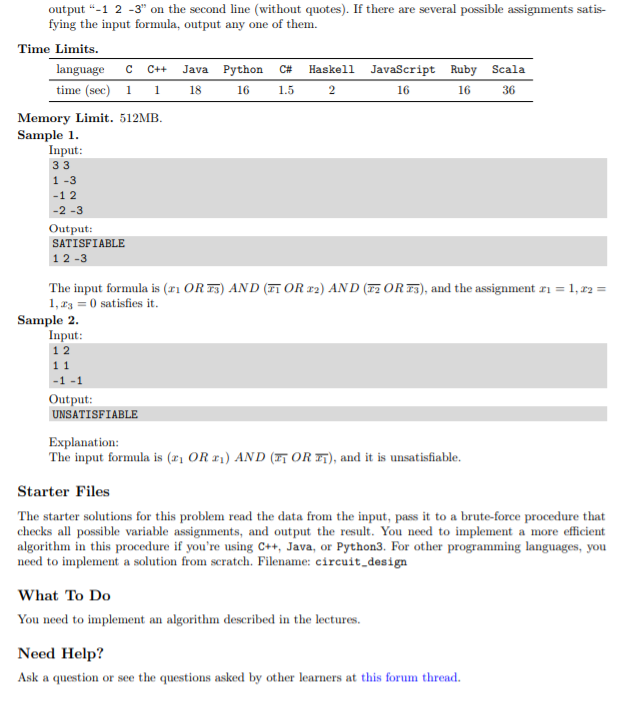

In [ ]:
# python3


import sys
import threading

sys.setrecursionlimit(10**7) # max depth of recursion
threading.stack_size(2**25)  # new thread will get stack of such size


def PostOrder(i, graph, visited, post):
    global clock
    visited[i] = True
    for v in graph[i]:
        if not visited[v]:
            PostOrder(v, graph, visited, post)
    post[i] = clock
    clock += 1


def DFS(n, graph):
    global clock
    visited = [False] * (2 * n + 1)
    post = [0] * (2 * n + 1)
    for v in range(1, 2 * n + 1):
        if not visited[v]:
            PostOrder(v, graph, visited, post)
    post = list(enumerate(post[1:], start=1))
    post.sort(key=lambda x:x[1], reverse=True)
    post_vertex = []
    for v, order in post:
        post_vertex.append(v)
    return post_vertex


def Explore(i, graph, visited, SCC, SCC_number, u):
    visited[i] = True
    SCC.append(i)
    SCC_number[i] = u
    for v in graph[i]:
        if not visited[v]:
            Explore(v, graph, visited, SCC, SCC_number, u)

def FindSCCs(n, rev_graph, graph):
    #dado un grafo, sacamos su SCC
    global clock
    # vamos aplicando el DFS
    post_vertex = DFS(n, rev_graph)
    #marcando los visitados
    visited = [False] * (2 * n + 1)
    SCCs = []
    SCC_number = [0] * (2 * n + 1)
    u = 1
    for i in post_vertex:
        if not visited[i]:
            SCC = []
            Explore(i, graph, visited, SCC, SCC_number, u)
            SCCs.append(SCC)
            u += 1
    return SCCs, SCC_number


def TwoSAT(n, rev_graph, graph):
    #tova un implicationgraph y su inverso y el numero de variables
    
    #primero necesitamos separar el grafo en strong connected components
    SCCs, SCC_number = FindSCCs(n, rev_graph, graph)
    # print(SCCs, SCC_number)
    for i in range(1, n + 1):
        if SCC_number[i] == SCC_number[i + n]:
            return False
    solution = [[] for _ in range(2 * n + 1)]
    assigned = [False] * (2 * n + 1)
    for SCC in SCCs:
        for v in SCC:
            if not assigned[v]:
                assigned[v] = True
                solution[v] = 1
                if v > n:
                    solution[v - n] = 0
                    assigned[v - n] = True
                else:
                    solution[v + n] = 0
                    assigned[v + n] = True
    return solution


clock = 1
def main():
    #n es la cantidad de variables y m la cantidad de clauses
    n, m = map(int, input().split())
    
    #ejes contiene todos los ejes
    #en la posicion 1,n estan las variables negativas -x_i
    # y en n+1,2n estan las positivas x_i
    edges = [[] for _ in range(2 * n + 1)]
    #y los ejes reversos
    rev_edges = [[] for _ in range(2 * n + 1)]
    
    #creamos aqui el implication graph
    for _ in range(m):
        #vamos tomanos los pares de variables en cada clause
        a, b = map(int, input().split())
        
        #si las dos variables son positivas
        if a > 0 and b > 0:
            #Hacemos un eje de x_a a -x_b
            edges[a + n].append(b)
            #un eje de x_b a -x_a
            edges[b + n].append(a)
            # y agregamos los ejes inversos tambien en rev_edges
            #donde se ponen las conexiones inversas
            rev_edges[b].append(a + n)
            rev_edges[a].append(b + n)
        #si a<0, b<0 hacemos lo mismo, pero cambian los indices
        elif a < 0 and b < 0:
            edges[-a].append(-b + n)
            edges[-b].append(-a + n)
            rev_edges[-b + n].append(-a)
            rev_edges[-a + n].append(-b)
        #si a<0, b<0 hacemos lo mismo, pero cambian los indices
        elif a < 0 and b > 0 :
            edges[-a].append(b)
            edges[b + n].append(-a + n)
            rev_edges[b].append(-a)
            rev_edges[-a + n].append(b + n)
        #si a<0, b<0 hacemos lo mismo, pero cambian los indices
        elif a > 0 and b < 0:
            edges[a + n].append(-b + n)
            edges[-b].append(a)
            rev_edges[-b + n].append(a + n)
            rev_edges[a].append(-b)
    #le aplicamos el algoritmo TwoSAT
    result = TwoSAT(n, rev_edges, edges)
    if not result:
        print('UNSATISFIABLE')
    else:
        print('SATISFIABLE')
        #imprimimos los numeritos
        for i in range(1, n + 1):
            if result[i] > 0:
                print(i, end=' ')
            else:
                print(-i, end=' ')


threading.Thread(target=main).start()
    
    
    

# Problema 2. 
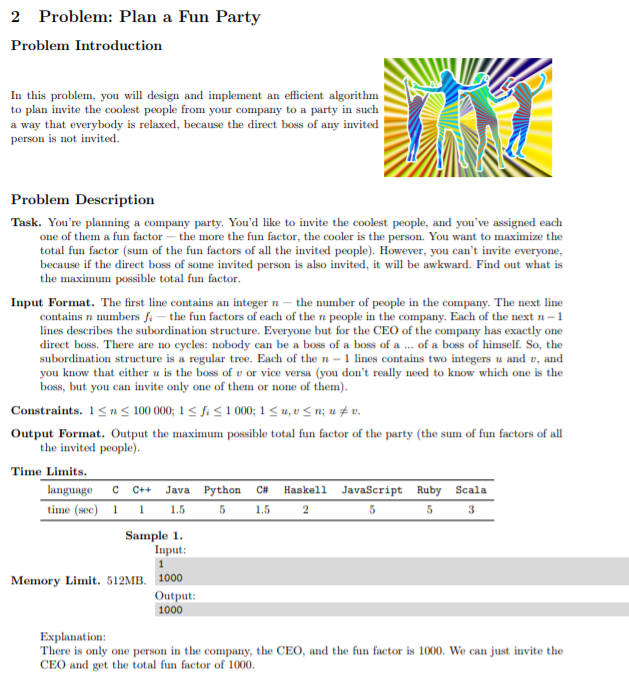

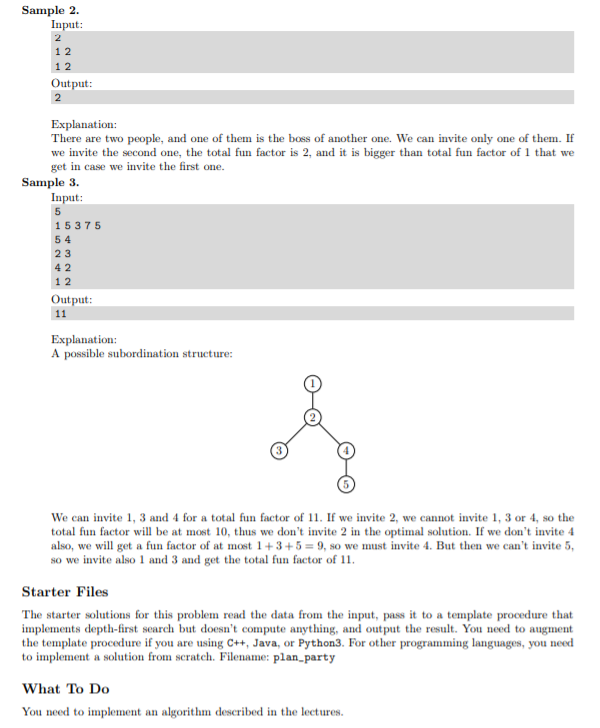

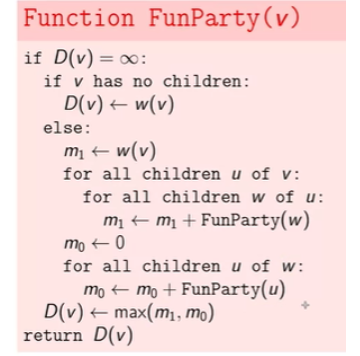

In [ ]:
# python3


import sys
import threading

# This code is used to avoid stack overflow issues
sys.setrecursionlimit(10**6) # max depth of recursion
threading.stack_size(2**26)  # new thread will get stack of such size


class Vertex:
    def __init__(self, weight):
        self.weight = weight
        self.children = []


def ReadTree():
    size = int(input())
    tree = [Vertex(w) for w in map(int, input().split())]
    for i in range(1, size):
        a, b = list(map(int, input().split()))
        tree[a - 1].children.append(b - 1)
        tree[b - 1].children.append(a - 1)
    return tree


def DFS(tree, v, parent, D):
    if D[v] == - 1:
        if len(tree[v].children) == 1 and v != 0:
            D[v] = tree[v].weight
        else:
            m1 = tree[v].weight
            for u in tree[v].children:
                if u != parent:
                    for w in tree[u].children:
                        if w != v:
                            m1 += DFS(tree, w, u, D)
            m0 = 0
            for u in tree[v].children:
                if u != parent:
                    m0 += DFS(tree, u, v, D)
            D[v] = max(m0, m1)
    return D[v]


def MaxWeightIndependentTreeSubset(tree):
    size = len(tree)
    if size == 0:
        return 0
    D = [-1] * size
    return DFS(tree, 0, -1, D)


def main():
    tree = ReadTree()
    weight = MaxWeightIndependentTreeSubset(tree)
    print(weight)


# This is to avoid stack overflow issues
threading.Thread(target=main).start()